<a href="https://colab.research.google.com/github/ashwini0921/MARKET-SEGMENTAION-FEYNN-LAB-INTERNSHIP/blob/main/Market_Segmentation_mcdonald_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [44]:
import pandas as pd
data=pd.read_csv("mcdonalds.csv");
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [46]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['yummy']= label_encoder.fit_transform(data['yummy'])
data['convenient']= label_encoder.fit_transform(data['convenient'])
data['spicy']= label_encoder.fit_transform(data['spicy'])
data['fattening']= label_encoder.fit_transform(data['fattening'])
data['greasy']= label_encoder.fit_transform(data['greasy'])
data['fast']= label_encoder.fit_transform(data['fast'])
data['cheap']= label_encoder.fit_transform(data['cheap'])
data['tasty']= label_encoder.fit_transform(data['tasty'])
data['expensive']= label_encoder.fit_transform(data['expensive'])
data['healthy']= label_encoder.fit_transform(data['healthy'])
data['disgusting']= label_encoder.fit_transform(data['disgusting'])
data['Gender']= label_encoder.fit_transform(data['Gender'])

In [48]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,1


In [49]:
data["Like"].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [50]:
for i in range(0,len(data['Like'])):
  if data['Like'][i]=='0':
    data['Like'][i]=0
  elif data['Like'][i][-2]=='+':
    data['Like'][i]=int(data['Like'][i][-1])
  elif data['Like'][i][-2]=='-':
    data['Like'][i]=-1*int(data['Like'][i][-1])
  else:
    data['Like'][i]=int(data['Like'][i][-1])
data['Like'] = data['Like'].astype(int)
data['Like']

<ipython-input-50-4a05719579c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Like'][i]=-1*int(data['Like'][i][-1])
<ipython-input-50-4a05719579c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Like'][i]=int(data['Like'][i][-1])
<ipython-input-50-4a05719579c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Like'][i]=0


0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64

In [51]:
data.dtypes

yummy              int64
convenient         int64
spicy              int64
fattening          int64
greasy             int64
fast               int64
cheap              int64
tasty              int64
expensive          int64
healthy            int64
disgusting         int64
Like               int64
Age                int64
VisitFrequency    object
Gender             int64
dtype: object

In [52]:
data["VisitFrequency"].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [53]:
for i in range(0,len(data["VisitFrequency"])):
  if data["VisitFrequency"][i]=='Every three months':
    data["VisitFrequency"][i]=4
  if data["VisitFrequency"][i]=='Once a week':
    data["VisitFrequency"][i]=52
  if data["VisitFrequency"][i]=='Once a month':
    data["VisitFrequency"][i]=12
  if data["VisitFrequency"][i]=='Once a year':
    data["VisitFrequency"][i]=1
  if data["VisitFrequency"][i]=='More than once a week':
    data["VisitFrequency"][i]=365
  if data["VisitFrequency"][i]=='Never':
    data["VisitFrequency"][i]=0
data["VisitFrequency"]=data['VisitFrequency'].astype(int)

<ipython-input-53-3f844f5a6a8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VisitFrequency"][i]=4
<ipython-input-53-3f844f5a6a8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VisitFrequency"][i]=52
<ipython-input-53-3f844f5a6a8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VisitFrequency"][i]=12
<ipython-input-53-3f844f5a6a8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [54]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,52,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,52,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,12,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,4,1


In [55]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,26.715760,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,68.742531,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,12.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,12.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,365.000000,1.000000


In [56]:
data.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,0.682827,-0.281653,0.233676,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,0.365767,-0.070597,0.090512,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,-0.009611,0.146217,0.022579,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.160129,-0.139254,-0.067130,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.257657,-0.233554,-0.068110,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,0.168519,-0.020558,0.036682,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.146461,0.016958,0.041669,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,0.644867,-0.194576,0.191703,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.139637,-0.070851,-0.002469,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.280800,0.021366,0.130070,-0.042455


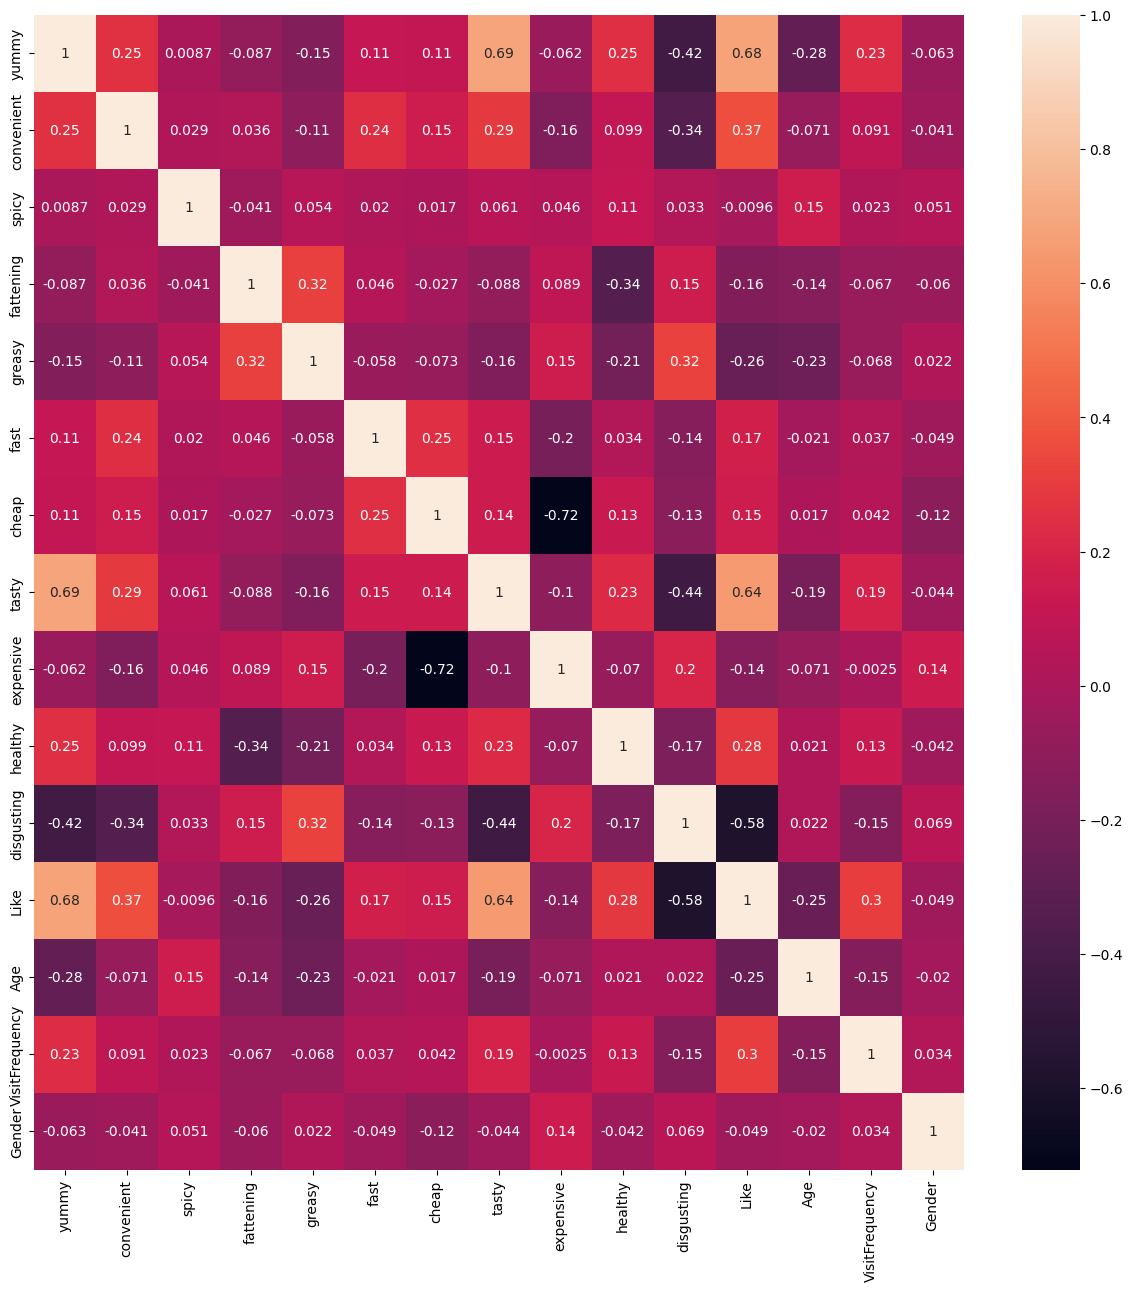

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

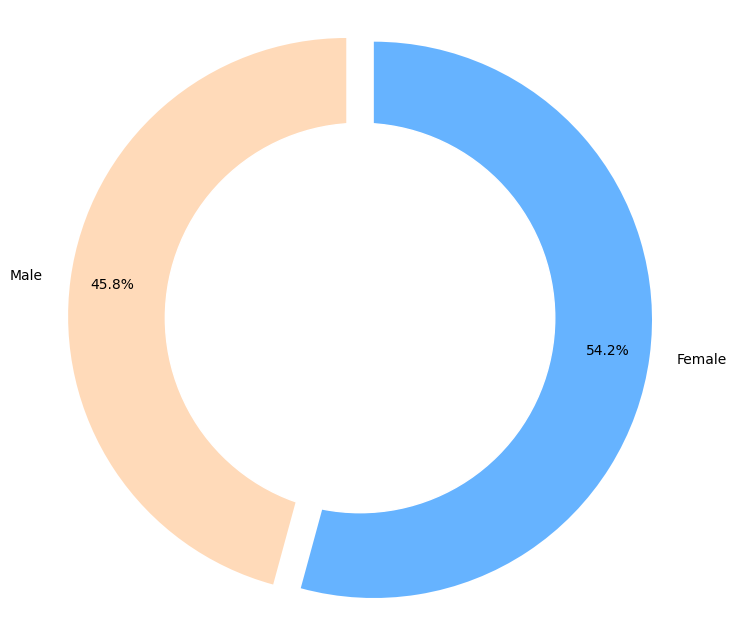

In [60]:
labels = ['Male','Female']
sizes = [data.query('Gender == 1').Gender.count(),data.query('Gender == 0').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

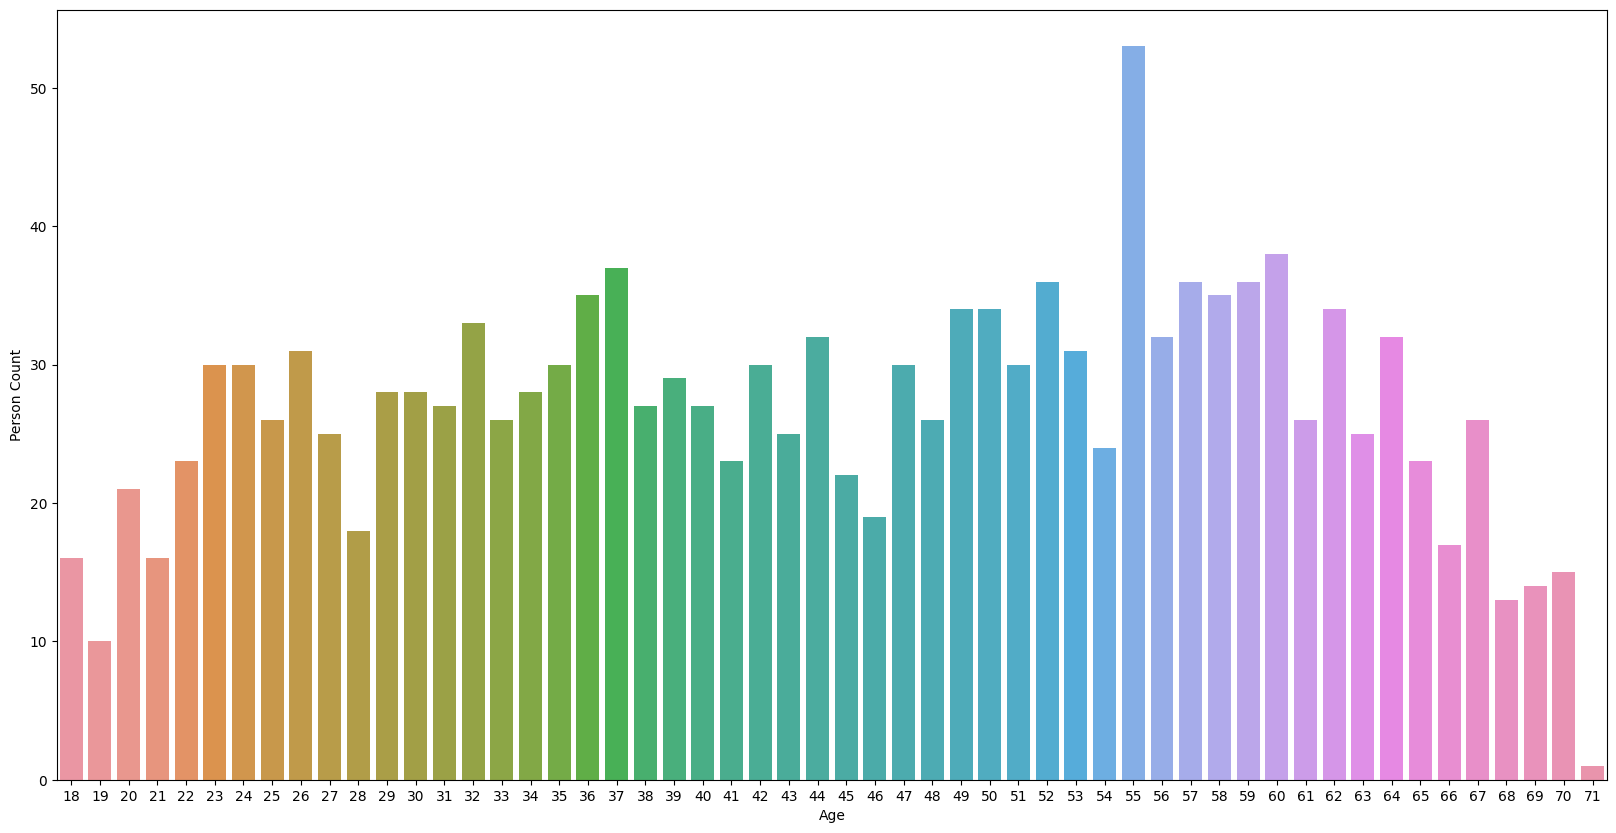

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["Age"])
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

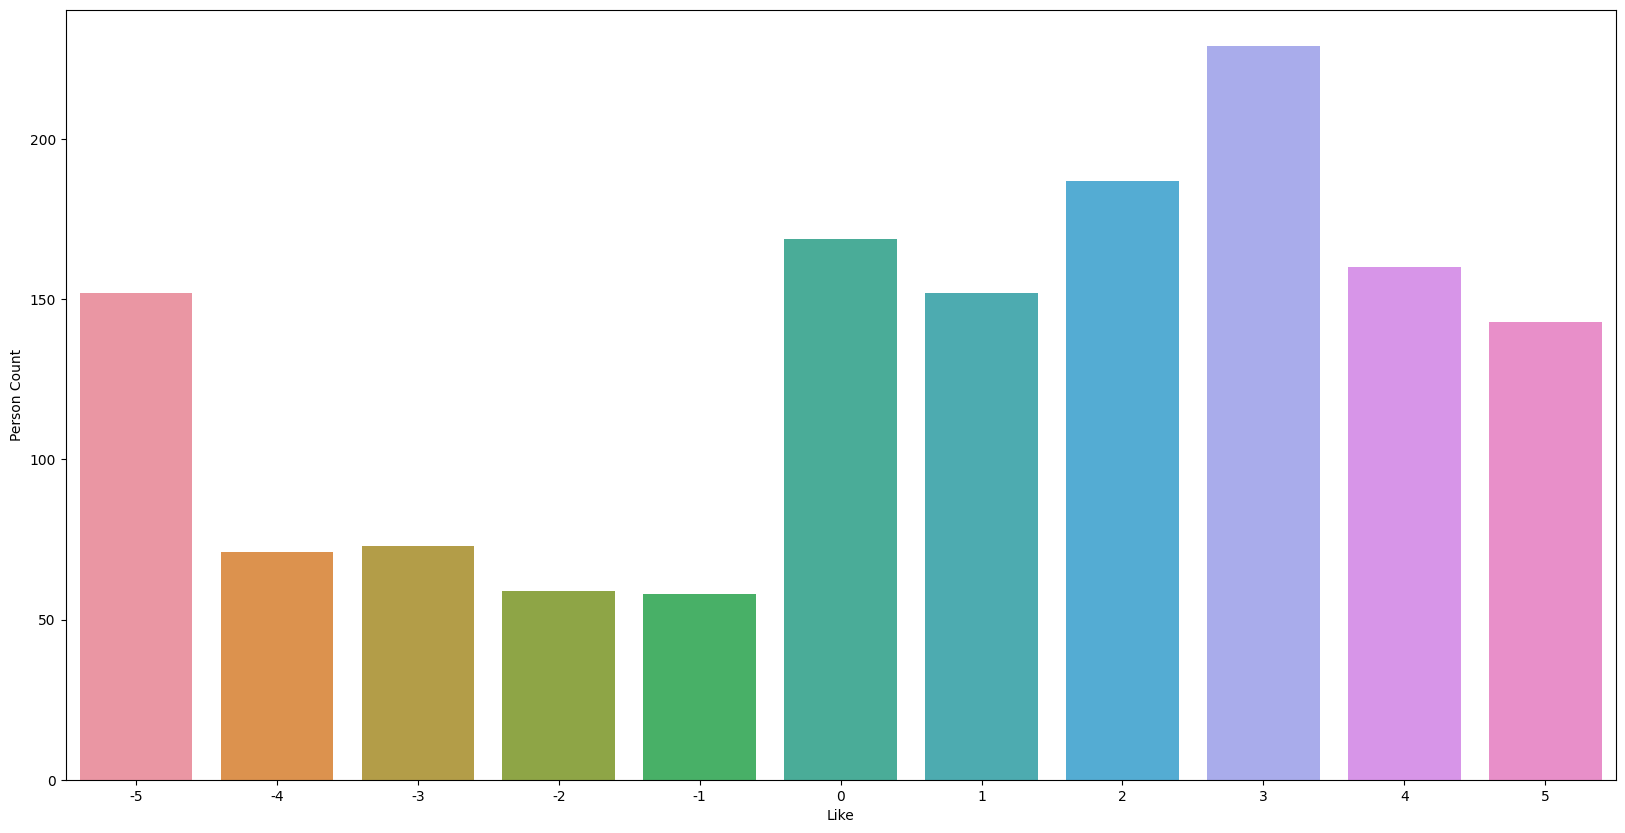

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["Like"])
plt.xlabel("Like")
plt.ylabel("Person Count")
plt.show()

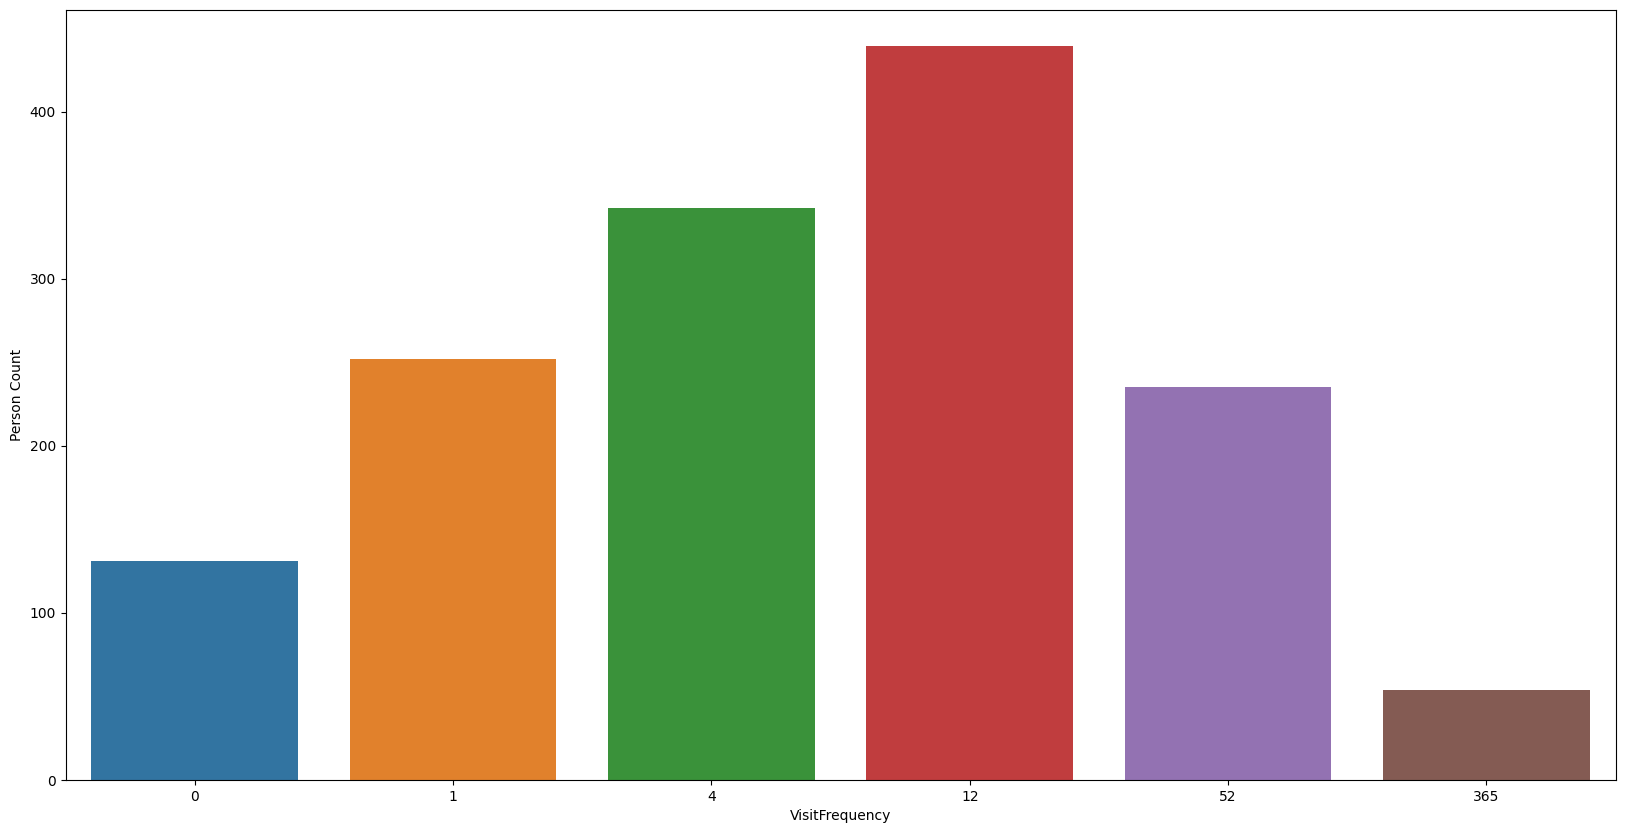

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["VisitFrequency"])
plt.xlabel("VisitFrequency")
plt.ylabel("Person Count")
plt.show()

In [93]:
columns=[]
for label in data:
  columns.append(label)
columns=columns[0:11]
for label in columns:
  count_ones = data[label].sum()
  count_zeros = (data[label] == 0).sum()
  total_count = len(data[label])
  percentage_ones = (count_ones / total_count) * 100
  percentage_zeros = (count_zeros / total_count) * 100
  print("percent of customer find it",end =" ")
  print(label,end =" ")
  print("=",end =" ")
  print(percentage_ones,end ="%, ")
  print("not",end =" ")
  print(label,end =" ")
  print("=",end =" ")
  print(percentage_zeros,end ="")
  print("%")

percent of customer find it yummy = 55.26496902959395%, not yummy = 44.73503097040606%
percent of customer find it convenient = 90.77770130763938%, not convenient = 9.222298692360633%
percent of customer find it spicy = 9.359944941500343%, not spicy = 90.64005505849966%
percent of customer find it fattening = 86.71713695801789%, not fattening = 13.282863041982107%
percent of customer find it greasy = 52.649690295939436%, not greasy = 47.350309704060564%
percent of customer find it fast = 90.02064693737096%, not fast = 9.979353062629043%
percent of customer find it cheap = 59.876118375774254%, not cheap = 40.12388162422574%
percent of customer find it tasty = 64.41844459738472%, not tasty = 35.58155540261528%
percent of customer find it expensive = 35.788024776324846%, not expensive = 64.21197522367515%
percent of customer find it healthy = 19.88988300068823%, not healthy = 80.11011699931177%
percent of customer find it disgusting = 24.294562973158982%, not disgusting = 75.7054370268410

In [95]:
#ok